# Numerical Quadrature

Numerical quadrature refers to approximating a definite integral numerically, 
$$~~ \int_a^b f(x) dx.$$
Many numerical analysis textbooks describe a variety of quadrature methods or "rules".  

First define a simple function for which we know the exact answer:

In [1]:
def f1(x):
    return 1. + x**3

a1 = 0.
b1 = 2.
int_true1 = (b1-a1) + (b1**4 -a1**4) / 4.
print "true integral: %22.14e" % int_true1

true integral:   6.00000000000000e+00


## The Trapezoid Rule

We will first look at the Trapezoid method.  This method is implemented by evaluating the function at $n$ points and then computing the areas of the trapezoids defined by a piecewise linear approximation to the original function defined by these points.  In the figure below, we are approximating the integral of the blue curve by the sum of the areas of the red trapezoids.

Populating the interactive namespace from numpy and matplotlib


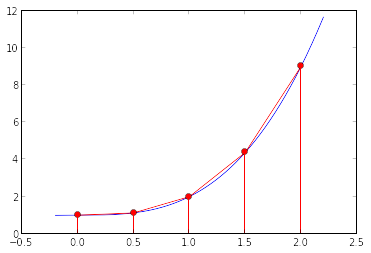

In [2]:
%pylab inline

def plot_trap(f,a,b,n):
    x = linspace(a-0.2, b+0.2, 10000) # points for smooth plot
    plot(x,f(x),'b-')
    xj = linspace(a,b,n)
    plot(xj,f(xj),'ro-')
    for xi in xj:
        plot([xi,xi], [0,f(xi)], 'r')
    plot([a,b], [0,0], 'r') # along x-axis

plot_trap(f1,a1,b1,5)

### The Trapezoid rule formula

The area of a single trapezoid is the width of the base times the average height, so between points $x_j$ and $x_{j+1}$ this gives:
$$ \frac{h}{2} (f(x_j) + f(x_{j+1}). $$

Summing this up over all the trapezoids gives:
$$ h\left(\frac 1 2 f(x_0) + f(x_1) + f(x_2) + \cdots + f(x_{n-2}) + \frac 1 2 f(x_{n-1})\right) = h\sum_{j=0}^{n-1} f(x_j) - \frac h 2 \left(f(x_0) + f(x_{n-1})\right) =  h\sum_{j=0}^{n-1} f(x_j) - \frac h 2 \left(f(a) + f(b))\right). $$

This can be implemented as follows (note that in Python fj[-1] refers to the last element of fj, and similarly fj[-2] would be the next to last element).

In [3]:
def trapezoid(f,a,b,n):
    h = (b-a)/(n-1)
    xj = linspace(a,b,n)
    fj = f(xj)
    int_trapezoid = h*sum(fj) - 0.5*h*(fj[0] + fj[-1])
    return int_trapezoid


We can test it out for the points used in the figure above:

In [4]:
n = 5
int_trap = trapezoid(f1,a1,b1,n)
error = abs(int_trap - int_true1)
print "trapezoid rule approximation: %22.14e,  error: %10.3e" % (int_trap, error)

trapezoid rule approximation:   6.25000000000000e+00,  error:  2.500e-01


Using more points will give a better approximation, try changing it in the cell above.

### Convergence tests

If we increase n, the number of points used, and hence decrease h, the spacing between points, we expect the error to converge to zero for reasonable functions $f(x)$.

The trapezoid rule is "second order accurate", meaning that the error goes to zero like $O(h^2)$ for a function that is sufficiently smooth (for example if its second derivative is continuous).  For small $h$, the error is expected to be behave like $Ch^2 + O(h^3)~$ as $h$ goes to zero, where $C$ is some constant that depends on how smooth $h$ is.  

If we double n (and halve h) then we expect the error to go down by a factor of 4 roughly (from $Ch^2$ to $C(h/2)^2~$).

We can check this by trying several values of n and making a table of the errors and the ratio from one n to the next:

In [5]:
def error_table(f,a,b,nvals,int_true,method=trapezoid):
    """
    An improved version that takes the function defining the method as an
    input argument.
    """
    print "      n         approximation        error       ratio"
    last_error = 0.  # need something for first ratio
    for n in nvals:
        int_approx = method(f,a,b,n)
        error = abs(int_approx - int_true)
        ratio = last_error / error
        last_error = error # for next n
        print "%8i  %22.14e  %10.3e  %10.3e" % (n,int_approx, error, ratio)
    
nvals = array([5, 10, 20, 40, 80, 160, 320])
error_table(f1,a1,b1,nvals,int_true1,trapezoid)

      n         approximation        error       ratio
       5    6.25000000000000e+00   2.500e-01   0.000e+00
      10    6.04938271604938e+00   4.938e-02   5.062e+00
      20    6.01108033240997e+00   1.108e-02   4.457e+00
      40    6.00262984878369e+00   2.630e-03   4.213e+00
      80    6.00064092292902e+00   6.409e-04   4.103e+00
     160    6.00015822158934e+00   1.582e-04   4.051e+00
     320    6.00003930778982e+00   3.931e-05   4.025e+00


(Note that the first ratio reported is meaningless.)

Convergence might be easier to see in a plot.  If a method is p'th order accurate then we expect the error to behave like $E\approx Ch^p$ for some constant $C$, for small $h$.  This is hard to visualize.  It is much easier to see what order accuracy we are achieving if we produce a log-log plot instead, since $E = Ch^p~$ means that $\log E = \log C + p\log h$ 

In other words $\log E~$ is a linear function of $\log h~$.

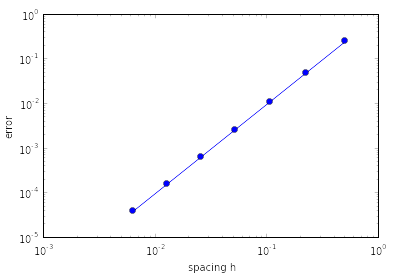

In [6]:
def error_plot(f,a,b,nvals,int_true,method=trapezoid):
    errvals = zeros(nvals.shape)  # initialize to right shape
    for i in range(len(nvals)):
        n = nvals[i]
        int_approx = method(f,a,b,n)
        error = abs(int_approx - int_true)
        errvals[i] = error
    hvals = (b - a) / (nvals - 1)  # vector of h values for each n
    loglog(hvals,errvals, 'o-')
    xlabel('spacing h')
    ylabel('error')
    
error_plot(f1,a1,b1,nvals,int_true1,trapezoid)

### An oscillatory function

If the function $f(x)$ is not as smooth (has larger second derivative at various places) then the accuracy with a small number of points will not be nearly as good.  For example, consider the function $f_2(x) = 1 + x^3 + \sin(kx)~~~$ where $k$ is a parameter.  For large $k$ this function is very oscillatory.  In order to experiment with different values of $k$, we can define a "function factory" that creates this function for any given $k$, and also returns the true integral over a given interval:

In [7]:
def f2_factory(k, a, b):
    def f2(x):
        return 1 + x**3 + sin(k*x)
    int_true = (b-a) + (b**4 - a**4) / 4. - (1./k) * (cos(k*b) - cos(k*a))
    return f2, int_true
    

First create a version of $f_2$ with $k=50$:

In [8]:
k = 50.
a2 = 0.
b2 = 2.
f2, int_true2 = f2_factory(k, a2, b2)
print "true integral: %22.14e" % int_true2

true integral:   6.00275362255425e+00


For this function with k=50, using n=10 points is not going to give a very good approximation:

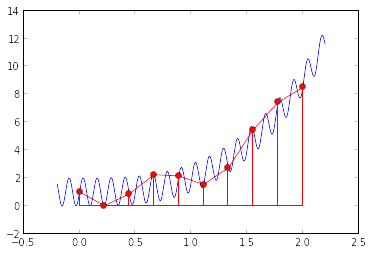

In [9]:
plot_trap(f2,a2,b2,10)

This doesn't look very good, but for larger values of $n$ we still see the expected convergence rate:

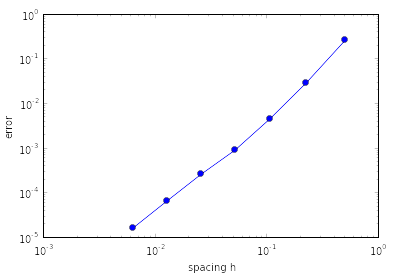

In [10]:
error_plot(f2,a2,b2,nvals,int_true2)

Now make the function much more oscillatory with a larger value of $k$...

In [11]:
k = 1000.
f2, int_true2 = f2_factory(k,a2,b2)
print "true integral: %22.14e" % int_true2

true integral:   6.00136745954910e+00


For the previous choice of nvals the method does not seem to be doing well:

nvals =  [  5  10  20  40  80 160 320]


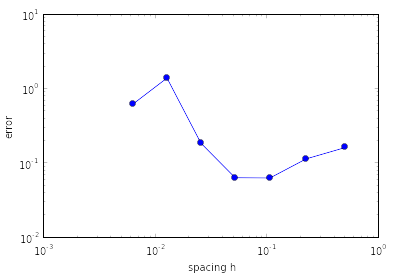

In [12]:
nvals = array([5, 10, 20, 40, 80, 160, 320])
print "nvals = ",nvals
error_plot(f2,a2,b2,nvals,int_true2, trapezoid)

In this case the $O(h^2)~$ behavior does not become apparent unless we use much smaller $h$ values so that we are resolving the oscillations:

nvals =  [    5    10    20    40    80   160   320   640  1280  2560  5120 10240]


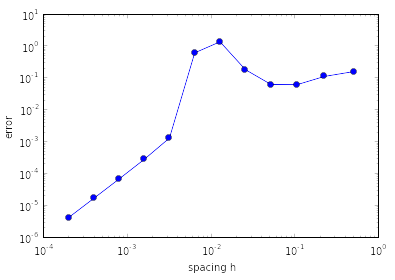

In [13]:
nvals = array([5 * 2**i for i in range(12)])
print "nvals = ",nvals
error_plot(f2,a2,b2,nvals,int_true2,trapezoid)

Eventually we see second order convergence and ratios that approach 4:

In [14]:
error_table(f2,a2,b2,nvals,int_true2,trapezoid)

      n         approximation        error       ratio
       5    6.16511276525547e+00   1.637e-01   0.000e+00
      10    6.11640342954375e+00   1.150e-01   1.423e+00
      20    5.93766915031525e+00   6.370e-02   1.806e+00
      40    6.06556743605608e+00   6.420e-02   9.922e-01
      80    6.18855102747922e+00   1.872e-01   3.430e-01
     160    7.40477216296790e+00   1.403e+00   1.334e-01
     320    5.36931843072561e+00   6.320e-01   2.220e+00
     640    6.00002231770676e+00   1.345e-03   4.699e+02
    1280    6.00107919913986e+00   2.883e-04   4.666e+00
    2560    6.00129774432062e+00   6.972e-05   4.135e+00
    5120    6.00135017283867e+00   1.729e-05   4.033e+00
   10240    6.00136314705017e+00   4.312e-06   4.009e+00


## Simpson's Rule

There are much better methods than the Trapezoidal rule that are not much harder to implement but get much smaller errors with the same number of function evaluations. One such method is Simpson’s rule, which approximates the integral over a single interval from $x_i$ to $x_{i+1}$ by
$$\int_{x_i}^{x_{i+1}} f(x)\, dx \approx \frac h 6 (f(x_i) + 4f(x_{i+1/2}) + f(x_{i+1})),$$
where $x_{i+1/2} = \frac 1 2 (x_i + x_{i+1}) = x_i + h/2.$

Derivation: The trapezoid method is derived by approximating the function on each interval by a linear function interpolating at the two endpoints of each interval and then integrating this linear function.  Simpson's method is derived by approximating the function by a quadratic function interpolating at the endpoints and the center of the interval and integrating this quadratic function.

Adding this up over $n-1$  intervals gives the approximation
$$\frac{h}{6}[f(x_0) + 4f(x_{1/2}) + 2f(x_1) + 4f(x_{3/2}) + 2f(x_2) + \cdots + 2f(x_{n-2}) + 4f(x_{n-3/2}) + f(x_{n-1})].$$
In Python this can be implemented by the following code:

In [15]:
def simpson(f,a,b,n):
    h = (b-a)/(n-1)
    xj = linspace(a,b,n)
    fj = f(xj)
    xc = linspace(a+h/2,b-h/2,n-1)  # midpoints of cells
    fc = f(xc)
    int_simpson = (h/6.) * (2.*sum(fj) - (fj[0] + fj[-1]) + 4.*sum(fc))
    return int_simpson

This method is 4th order accurate, which means that on fine enough grids the error is proportional to \Delta x^4. Hence increasing n by a factor of 2 should decrease the error by a factor of 2^4 = 16.  Let's try it on the last function we were experimenting with:

In [16]:
k = 1000.
f2, int_true2 = f2_factory(k,a2,b2)
print "true integral: %22.14e" % int_true2

error_table(f2,a2,b2,nvals,int_true2,simpson)

true integral:   6.00136745954910e+00
      n         approximation        error       ratio
       5    5.73687339985881e+00   2.645e-01   0.000e+00
      10    5.91163035788901e+00   8.974e-02   2.947e+00
      20    6.04406704558838e+00   4.270e-02   2.102e+00
      40    6.06900954932785e+00   6.764e-02   6.313e-01
      80    6.18844048197182e+00   1.871e-01   3.616e-01
     160    7.40463149442203e+00   1.403e+00   1.333e-01
     320    6.21025000380603e+00   2.089e-01   6.718e+00
     640    6.00143086444865e+00   6.340e-05   3.294e+03
    1280    6.00137051926170e+00   3.060e-06   2.072e+01
    2560    6.00136763998022e+00   1.804e-07   1.696e+01
    5120    6.00136747066329e+00   1.111e-08   1.623e+01
   10240    6.00136746024110e+00   6.920e-10   1.606e+01


Note that the errors get smaller much faster and the ratio approaches 16.  The improvement over the trapezoid method is seen more clearly if we plot the errors together:

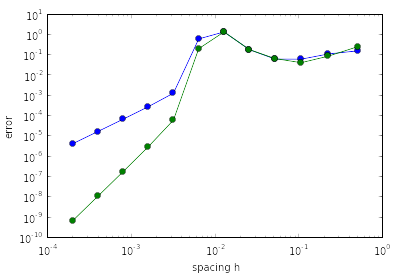

In [17]:
error_plot(f2,a2,b2,nvals,int_true2,trapezoid)
error_plot(f2,a2,b2,nvals,int_true2,simpson)

You might want to experiment with changing $k$ in the two cells above.

#### Simpson's method integrates cubic functions exactly

Even though Simpson'e method is derived by integrating a quadratic approximation of the function, rather than linear as with the Trapezoid Rule, in fact it also integrates a cubic exactly, as seen if we try it out with the function f1 defined at the top of this notebook.  (This is because the error between the cubic and the quadratic approximation on each interval is not zero but does have integral equal to zero since it turns out to be an odd function about the midpoint.)  For this reason Simpson's Rule is fourth order accurate in general rather than only third order, as one might expect when going from a linear to quadratic approximation.

Note the error ratios are whacky as a result.

In [18]:
error_table(f1,a1,b1,nvals,int_true1,simpson)

      n         approximation        error       ratio
       5    6.00000000000000e+00   0.000e+00         nan
      10    6.00000000000000e+00   0.000e+00         nan
      20    6.00000000000000e+00   0.000e+00         nan
      40    6.00000000000000e+00   8.882e-16   0.000e+00
      80    6.00000000000000e+00   8.882e-16   1.000e+00
     160    6.00000000000000e+00   0.000e+00         inf
     320    6.00000000000000e+00   8.882e-16   0.000e+00
     640    6.00000000000000e+00   0.000e+00         inf
    1280    6.00000000000000e+00   0.000e+00         nan
    2560    6.00000000000000e+00   0.000e+00         nan
    5120    6.00000000000000e+00   0.000e+00         nan
   10240    6.00000000000000e+00   1.776e-15   0.000e+00


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:11: RuntimeWarning: divide by zero encountered in double_scalars
